In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,0
1,0
2,4
3,1
4,1
...,...
319,1
320,1
321,0
322,3


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.998623,0.000003,0.001171,0.000194,0.000009,9.995442e-01,3.935062e-07,0.000443,1.267785e-05,2.504413e-08
1,0.863592,0.000120,0.126169,0.009554,0.000564,9.089851e-01,3.118868e-03,0.076693,9.322247e-03,1.880634e-03
2,0.000006,0.999026,0.000138,0.000139,0.000693,7.556745e-04,3.511197e-01,0.001507,2.883876e-02,6.177788e-01
3,0.005377,0.000066,0.985897,0.001678,0.006981,8.696284e-01,4.265984e-03,0.104145,2.133347e-02,6.267836e-04
4,0.995395,0.000007,0.003771,0.000785,0.000043,8.791983e-01,1.494983e-04,0.120508,1.384351e-04,6.145274e-06
5,0.000004,0.999558,0.000026,0.000131,0.000281,1.786084e-03,7.383701e-01,0.000211,1.013022e-01,1.583304e-01
6,0.842592,0.000108,0.149157,0.007340,0.000803,9.037082e-01,2.897428e-04,0.088840,1.860610e-03,5.300986e-03
7,0.996326,0.000007,0.002922,0.000708,0.000037,9.879046e-01,5.355497e-05,0.012015,2.568410e-05,9.616773e-07
8,0.000752,0.000046,0.995593,0.000640,0.002969,6.907547e-01,4.099027e-05,0.309094,1.848463e-05,9.158390e-05
9,0.000365,0.000028,0.996910,0.000248,0.002449,8.899862e-06,8.276012e-04,0.972352,5.004911e-04,2.631076e-02


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.998536,0.000003,0.001252,0.000196,0.000012,0.999964,4.863635e-07,0.000017,0.000018,3.251217e-09
1,0.995608,0.000007,0.004105,0.000235,0.000044,0.976302,1.321350e-03,0.013319,0.007374,1.683702e-03
2,0.000009,0.000345,0.001256,0.000128,0.998262,0.001590,4.335651e-03,0.025850,0.048297,9.199263e-01
3,0.000005,0.999632,0.000026,0.000116,0.000222,0.000021,9.714687e-01,0.000007,0.010179,1.832395e-02
4,0.000006,0.999636,0.000036,0.000114,0.000209,0.000048,8.069605e-01,0.000045,0.158728,3.421883e-02
...,...,...,...,...,...,...,...,...,...,...
319,0.000004,0.999601,0.000025,0.000155,0.000215,0.000098,3.805059e-01,0.004181,0.614931,2.848075e-04
320,0.000017,0.999303,0.000075,0.000163,0.000443,0.000400,8.983632e-01,0.000106,0.096810,4.320474e-03
321,0.995396,0.000008,0.003703,0.000851,0.000041,0.910539,1.002639e-02,0.076184,0.003210,4.094253e-05
322,0.042132,0.000850,0.225819,0.723654,0.007546,0.000283,8.965317e-01,0.020081,0.079234,3.869890e-03


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

# training machine learning

In [18]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='sigmoid')
svm=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [19]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 3, 0, 0, 0, 4, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 4, 0, 2, 3, 1, 4, 0, 2, 3, 3, 2, 0])

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       1.00      1.00      1.00         4
           2       0.71      0.71      0.71         7
           3       1.00      1.00      1.00         4
           4       1.00      0.75      0.86         4

    accuracy                           0.89        36
   macro avg       0.92      0.88      0.90        36
weighted avg       0.89      0.89      0.89        36

----accuracy score 88.88888888888889 ----


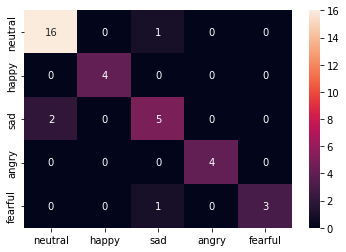

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [21]:
path='/content/drive/My Drive/fusion/savee_fusion_model/svm/sigmoid/expert2'
savedvX = joblib.dump(svm, path)

print("MODEL SAVED")

MODEL SAVED
